In [227]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

# Linear Model
from statsmodels.formula.api import ols

In [228]:
# getting data

df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")


df["log_rainfall"] = np.log(df.rainfall)


df.head()

,temperature,rainfall,flyers,sales,log_rainfall
0,27.0,2.00,15,10,0.693147
1,28.9,1.33,15,13,0.285179
2,34.5,1.33,27,15,0.285179
3,44.1,1.05,28,17,0.048790
4,42.4,1.00,33,18,0.000000


In [229]:
# creating a baseline


baseline = df.sales.mean()


baseline

25.323287671232876

In [230]:
# creating a dataframe for evaluation purpose

eval1 = pd.DataFrame()


In [231]:
# adding columns to our dataframe

eval1['x'] = df.flyers
eval1['y'] = df.sales


eval1['baseline_residuals'] = baseline - df.sales
eval1['baseline'] = df.sales.mean()
eval1

,x,y,baseline_residuals,baseline
0,15,10,15.323288,25.323288
1,15,13,12.323288,25.323288
2,27,15,10.323288,25.323288
3,28,17,8.323288,25.323288
4,33,18,7.323288,25.323288
...,...,...,...,...
360,33,19,6.323288,25.323288
361,32,16,9.323288,25.323288
362,17,15,10.323288,25.323288
363,22,13,12.323288,25.323288


In [232]:
# creating and fitting model, then predicting from the model

model = ols('sales ~ flyers', df).fit()

eval1['yhat'] = model.predict()

In [233]:
eval1

,x,y,baseline_residuals,baseline,yhat
0,15,10,15.323288,25.323288,14.673754
1,15,13,12.323288,25.323288,14.673754
2,27,15,10.323288,25.323288,19.727926
3,28,17,8.323288,25.323288,20.149107
4,33,18,7.323288,25.323288,22.255013
...,...,...,...,...,...
360,33,19,6.323288,25.323288,22.255013
361,32,16,9.323288,25.323288,21.833832
362,17,15,10.323288,25.323288,15.516116
363,22,13,12.323288,25.323288,17.622021


In [234]:
# calculating the model residuals

eval1['model_residual'] = eval1.yhat - eval1.y

In [235]:
eval1

,x,y,baseline_residuals,baseline,yhat,model_residual
0,15,10,15.323288,25.323288,14.673754,4.673754
1,15,13,12.323288,25.323288,14.673754,1.673754
2,27,15,10.323288,25.323288,19.727926,4.727926
3,28,17,8.323288,25.323288,20.149107,3.149107
4,33,18,7.323288,25.323288,22.255013,4.255013
...,...,...,...,...,...,...
360,33,19,6.323288,25.323288,22.255013,3.255013
361,32,16,9.323288,25.323288,21.833832,5.833832
362,17,15,10.323288,25.323288,15.516116,0.516116
363,22,13,12.323288,25.323288,17.622021,4.622021


In [236]:
# calculating the baseling sse

baseline_sse = (eval1.baseline_residuals **2).sum()
baseline_sse

17297.85205479452

In [237]:
# calculating the model sse

model_sse = (eval1.model_residual**2).sum()
model_sse

6083.326244705024

In [238]:
if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 6083.326244705024


In [239]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [240]:
# calculating the mse

mse = mean_squared_error(eval1.y, eval1.yhat)
mse

16.666647245767187

In [241]:
# calculating the rmse

rmse = sqrt(mse)

In [242]:
print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


In [243]:
# calculating the r2

r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.648


In [244]:
# getting the p_val

f_pval = model.f_pvalue

print("p-value for model significance = ", f_pval)

p-value for model significance =  2.193718738113383e-84


In [245]:
f_pval<.05

True

## since the p value is lower that our alpha, we reject the null hypothesis that our model with regression coefficients of zero explains the relationship


**Rejecting null hypothesis validates the R2 value**

    - So, we can conlcude that our feature is significant

- In the next section of your notebook, perform the steps above with the rainfall column as the model's feature. Does this model beat the baseline? Would you prefer the rainfall model over the flyers model?


In [246]:
df

,temperature,rainfall,flyers,sales,log_rainfall
0,27.0,2.00,15,10,0.693147
1,28.9,1.33,15,13,0.285179
2,34.5,1.33,27,15,0.285179
3,44.1,1.05,28,17,0.048790
4,42.4,1.00,33,18,0.000000
...,...,...,...,...,...
360,42.7,1.00,33,19,0.000000
361,37.8,1.25,32,16,0.223144
362,39.5,1.25,17,15,0.223144
363,30.9,1.43,22,13,0.357674


In [247]:
# lets get the baseline

base_line = df.sales.mean()
base_line

25.323287671232876

In [248]:
# create a dataframe to store all of our evaluation metrics

eval2 = pd.DataFrame()

In [249]:
# assigning our dependent(y) and independent(x) variables

eval2['x'] = df.rainfall
eval2['y'] = df.sales

In [250]:
# getting our baseline to the dataframe

eval2['baseline'] = df.sales.mean()

In [251]:
# calculating the baseline residuals

eval2['baseline_residuals'] = eval2.baseline-eval2.y
eval2

,x,y,baseline,baseline_residuals
0,2.00,10,25.323288,15.323288
1,1.33,13,25.323288,12.323288
2,1.33,15,25.323288,10.323288
3,1.05,17,25.323288,8.323288
4,1.00,18,25.323288,7.323288
...,...,...,...,...
360,1.00,19,25.323288,6.323288
361,1.25,16,25.323288,9.323288
362,1.25,15,25.323288,10.323288
363,1.43,13,25.323288,12.323288


In [252]:
# creating and fitting our simple regression model

model2 = ols('sales ~ rainfall', df).fit()

In [253]:
# predicting our dependent variable


eval2['yhat'] = model2.predict()

In [254]:
# calcualting our baseline redidual

eval2['model_residual'] = eval2.yhat - eval2.y
eval2

,x,y,baseline,baseline_residuals,yhat,model_residual
0,2.00,10,25.323288,15.323288,-1.599602,-11.599602
1,1.33,13,25.323288,12.323288,13.773142,0.773142
2,1.33,15,25.323288,10.323288,13.773142,-1.226858
3,1.05,17,25.323288,8.323288,20.197573,3.197573
4,1.00,18,25.323288,7.323288,21.344793,3.344793
...,...,...,...,...,...,...
360,1.00,19,25.323288,6.323288,21.344793,2.344793
361,1.25,16,25.323288,9.323288,15.608694,-0.391306
362,1.25,15,25.323288,10.323288,15.608694,0.608694
363,1.43,13,25.323288,12.323288,11.478703,-1.521297


In [255]:
# lets get our SSE, RMSE, MSE

baseline_sse = (eval2.baseline_residuals **2).sum()


model_sse = (eval2.model_residual ** 2) . sum()


if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)


Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 2998.2371310300655


In [256]:
mse = mean_squared_error(eval2.y, eval2.yhat)


rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 2998.2371310300655  which is the sum sf squared errors
MSE is 8.21434830419196  which is the average squared error
RMSE is 2.866068440249109  which is the square root of the MSE


In [257]:
# lets calcualate the R2

r2 = model2.rsquared

print('R-squared = ', round(r2,3))

R-squared =  0.827


In [258]:
# lets calcuate the p value because its the ultimate way to determine if our test is significant

f_pval = model2.f_pvalue
print("p-value for model significance = ", f_pval)


# p value is extremely smaller than our a. So, we can reject our null hypothesis that 
# no predictor model explains the relationship
# better

p-value for model significance =  3.2988846597381e-140


- In the next section of your notebook, perform the steps above with the log_rainfall column as the model's feature. Does this model beat the baseline? Would you prefer the log_rainfall model over the flyers model? Would you prefer the model built with log_rainfall over the rainfall model from before?

In [259]:
# lets get the baseline

base_line = df.sales.mean()
base_line

25.323287671232876

In [260]:
# lets create the dataframe

eval3 = pd.DataFrame()

In [261]:
# assigning our dependent(y) and independent(x) variables

eval3['x'] = df.log_rainfall
eval3['y'] = df.sales

# getting our baseline to the dataframe

eval3['baseline'] = df.sales.mean()


# calculating the baseline residuals

eval3['baseline_residuals'] = eval3.baseline-eval3.y
eval3

,x,y,baseline,baseline_residuals
0,0.693147,10,25.323288,15.323288
1,0.285179,13,25.323288,12.323288
2,0.285179,15,25.323288,10.323288
3,0.048790,17,25.323288,8.323288
4,0.000000,18,25.323288,7.323288
...,...,...,...,...
360,0.000000,19,25.323288,6.323288
361,0.223144,16,25.323288,9.323288
362,0.223144,15,25.323288,10.323288
363,0.357674,13,25.323288,12.323288


In [262]:
# creating and fitting our simple regression model

model3 = ols('sales ~ log_rainfall', df).fit()

In [263]:
# predicting our dependent variable


eval3['yhat'] = model3.predict()



# calcualting our model redidual

eval3['model_residual'] = eval3.yhat - eval3.y


eval3

,x,y,baseline,baseline_residuals,yhat,model_residual
0,0.693147,10,25.323288,15.323288,3.688573,-6.311427
1,0.285179,13,25.323288,12.323288,13.198359,0.198359
2,0.285179,15,25.323288,10.323288,13.198359,-1.801641
3,0.048790,17,25.323288,8.323288,18.708608,1.708608
4,0.000000,18,25.323288,7.323288,19.845912,1.845912
...,...,...,...,...,...,...
360,0.000000,19,25.323288,6.323288,19.845912,0.845912
361,0.223144,16,25.323288,9.323288,14.644411,-1.355589
362,0.223144,15,25.323288,10.323288,14.644411,-0.355589
363,0.357674,13,25.323288,12.323288,11.508480,-1.491520


In [264]:
# lets get our SSE, RMSE, MSE

baseline_sse = (eval3.baseline_residuals **2).sum()


model_sse = (eval3.model_residual ** 2) . sum()


if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)





mse = mean_squared_error(eval3.y, eval3.yhat)


rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum of squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 952.3253474293448
SSE is 952.3253474293448  which is the sum of squared errors
MSE is 2.6091105409023143  which is the average squared error
RMSE is 1.6152741380033033  which is the square root of the MSE


In [265]:
# lets calcualate the R2

r2 = model3.rsquared

print('R-squared = ', round(r2,3))

R-squared =  0.945


In [266]:
# lets calcuate the p value because its the ultimate way to determine if our test is significant

f_pval = model3.f_pvalue
print("p-value for model significance = ", f_pval)


# p value is extremely smaller than our a. So, we can reject our null hypothesis that 
# no predictor model explains the relationship
# better

p-value for model significance =  1.2242624097795882e-230


- In the next section of your notebook, perform the steps above with the temperature column as the model's only feature. Does this model beat the baseline? Would you prefer the rainfall, log_rainfall, or the flyers model?

In [267]:
# lets get the baseline

base_line = df.sales.mean()
base_line


# lets create the dataframe

eval4 = pd.DataFrame()



# assigning our dependent(y) and independent(x) variables

eval4['x'] = df.temperature
eval4['y'] = df.sales

# getting our baseline to the dataframe

eval4['baseline'] = df.sales.mean()


# calculating the baseline residuals

eval4['baseline_residuals'] = eval4.baseline-eval4.y
eval4


,x,y,baseline,baseline_residuals
0,27.0,10,25.323288,15.323288
1,28.9,13,25.323288,12.323288
2,34.5,15,25.323288,10.323288
3,44.1,17,25.323288,8.323288
4,42.4,18,25.323288,7.323288
...,...,...,...,...
360,42.7,19,25.323288,6.323288
361,37.8,16,25.323288,9.323288
362,39.5,15,25.323288,10.323288
363,30.9,13,25.323288,12.323288


In [268]:
# creating and fitting our simple regression model

model4 = ols('sales ~ temperature', df).fit()

In [269]:
# predicting our dependent variable


eval4['yhat'] = model4.predict()



# calcualting our model redidual

eval4['model_residual'] = eval4.yhat - eval4.y


eval4

,x,y,baseline,baseline_residuals,yhat,model_residual
0,27.0,10,25.323288,15.323288,11.112301,1.112301
1,28.9,13,25.323288,12.323288,11.912772,-1.087228
2,34.5,15,25.323288,10.323288,14.272055,-0.727945
3,44.1,17,25.323288,8.323288,18.316540,1.316540
4,42.4,18,25.323288,7.323288,17.600329,-0.399671
...,...,...,...,...,...,...
360,42.7,19,25.323288,6.323288,17.726719,-1.273281
361,37.8,16,25.323288,9.323288,15.662347,-0.337653
362,39.5,15,25.323288,10.323288,16.378557,1.378557
363,30.9,13,25.323288,12.323288,12.755373,-0.244627


In [270]:
# lets get our SSE, RMSE, MSE

baseline_sse = (eval4.baseline_residuals **2).sum()


model_sse = (eval4.model_residual ** 2) . sum()


if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)





mse = mean_squared_error(eval4.y, eval4.yhat)


rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum of squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 349.977815203168
SSE is 349.977815203168  which is the sum of squared errors
MSE is 0.9588433293237479  which is the average squared error
RMSE is 0.979205458177061  which is the square root of the MSE


In [271]:
# lets calcualate the R2

r2 = model4.rsquared

print('R-squared = ', round(r2,3))

R-squared =  0.98


In [272]:
# lets calcuate the p value because its the ultimate way to determine if our test is significant

f_pval = model4.f_pvalue
print("p-value for model significance = ", f_pval)


# p value is extremely smaller than our a. So, we can reject our null hypothesis that 
# no predictor model explains the relationship
# better

p-value for model significance =  1.492364042585725e-309


- Which of these 4 single regression models would you want to move forward with?
    - I would use the model with temperature as independent variable to predict the sales. Because the p value is lower that alpha, so we can reject the null hypothesis that the model with regression coefficients value zero better explains the relatioship between the independent and dependent variable
    - and the R2 value is really really high, basically a 1

In [273]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

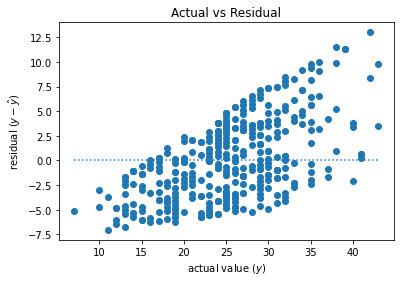

In [274]:
# for model 1

plot_residuals(eval1.y, eval1.yhat)

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

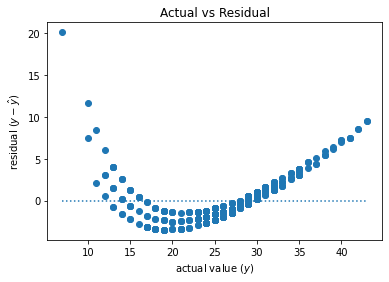

In [275]:
# for model 2

plot_residuals(eval2.y, eval2.yhat)

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

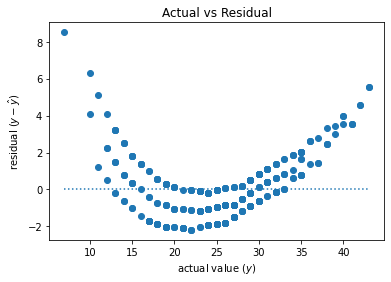

In [276]:
# for model 3

plot_residuals(eval3.y, eval3.yhat)

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

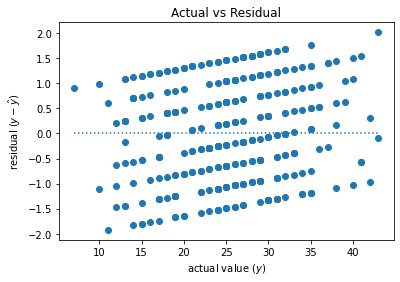

In [277]:
# for model 4

plot_residuals(eval4.y, eval4.yhat)

## Tips DataSet

In [278]:
# lets load the data

df = data('tips')

In [279]:
# lets take a look

df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [280]:
# baseline
baseline = df.tip.mean()
baseline

2.9982786885245902

In [281]:
# fitting a linear regression

m1 = ols('tip ~ total_bill', df).fit()



In [282]:
# lets create a dataframe

evaluate = pd.DataFrame()

In [283]:
# adding our independent, dependent, baseline, baseline residual, and prediction to our dataframe

evaluate['x'] = df.total_bill
evaluate['y'] = df.tip
evaluate['baseline'] = df.tip.mean()
evaluate['baseline_residual'] = evaluate.baseline - evaluate.y

evaluate['yhat'] = m1.predict()

In [284]:
evaluate

,x,y,baseline,baseline_residual,yhat
1,16.99,1.01,2.998279,1.988279,2.704636
2,10.34,1.66,2.998279,1.338279,2.006223
3,21.01,3.50,2.998279,-0.501721,3.126835
4,23.68,3.31,2.998279,-0.311721,3.407250
5,24.59,3.61,2.998279,-0.611721,3.502822
...,...,...,...,...,...
240,29.03,5.92,2.998279,-2.921721,3.969131
241,27.18,2.00,2.998279,0.998279,3.774836
242,22.67,2.00,2.998279,0.998279,3.301175
243,17.82,1.75,2.998279,1.248279,2.791807


In [285]:
# calculating our model residual

evaluate['model_residual'] = evaluate.yhat - evaluate.y



In [286]:
baseline_sse = (evaluate.baseline_residual **2).sum()


model_sse = (evaluate.model_residual ** 2) . sum()


if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)





mse = mean_squared_error(evaluate.y, evaluate.yhat)


rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum of squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 465.2124770491804
Model SSE 252.788743850776
SSE is 252.788743850776  which is the sum of squared errors
MSE is 1.036019442011377  which is the average squared error
RMSE is 1.0178504025697377  which is the square root of the MSE


In [287]:
# lets calcualate the R2

r2 = m1.rsquared

print('R-squared = ', round(r2,3))

R-squared =  0.457


In [288]:
# lets calcuate the p value because its the ultimate way to determine if our test is significant

f_pval = m1.f_pvalue
print("p-value for model significance = ", f_pval)


# p value is extremely smaller than our a. So, we can reject our null hypothesis that 
# no predictor model explains the relationship
# better

p-value for model significance =  6.692470646863376e-34


### our model is better than the baseline model because we were able to reject the null hypothesis that the no predictors model better explains the relationship between the independent and dependent variables based on our F-statistics. In otherwors, R2 value is validated, meaning, the correlation is statistically significant

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

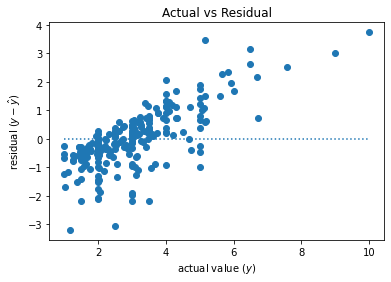

In [289]:
plot_residuals(evaluate.y, evaluate.yhat)